# **Exploratory Data Analysis in SQL - Book Genres Over Time**
### What are people reading these days?





---
## **Executive Summary:**
This project analyzes the trends in book genres over time using **SQL**, **Excel**, and **Power BI**. By pulling book genre data from a database, cleaning it, and visualizing the results, we identify key patterns in genre popularity. Notable findings include the consistent growth of Adventure, Romance, and Fantasy genres and a decline in Mystery and Historical Fiction. The project provides actionable recommendations for publishers to adjust their strategies and optimize sales based on evolving reader preferences.

## **Business Problem:**
Publishing companies and authors need insights into changing reader preferences to make informed decisions on book releases and marketing strategies. The objective of this analysis is to identify which genres are rising or declining in popularity over time and suggest how publishers can adapt their approaches to maximize engagement and sales.

## **Methodology:**
### 1. **Data Extraction and Cleaning**:
   - **Excel**: Loaded and cleaned the dataset (Books_Data_Clean.xls) by standardizing genre names and eliminating incomplete or inconsistent data - 1st deleted row duplicates, corrected entries encoded incorrectly, and filled rows with blank data containing the correct book specified for each row (these were researched and carefully evaluated guesses utilizing the information given, but if there was more than 1 book that mapped on to the data accurately, the row was deleted)
   # *Before* 


   > 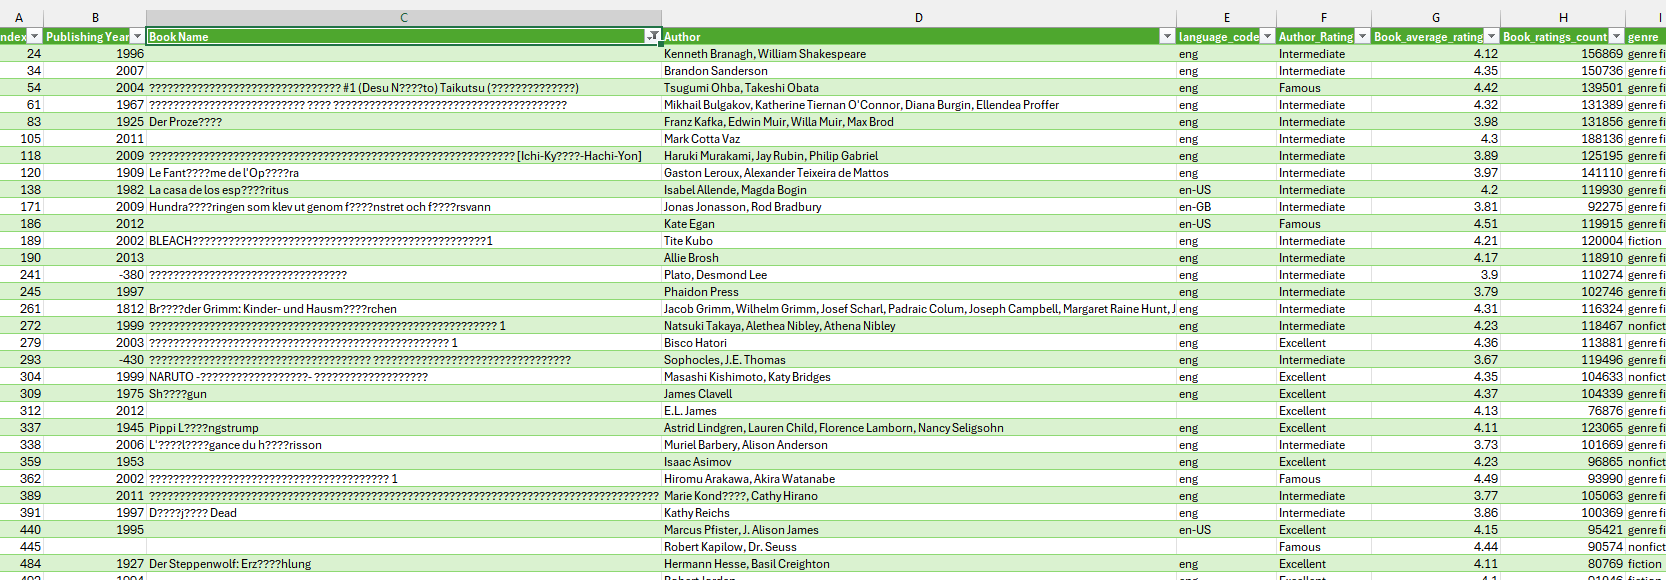 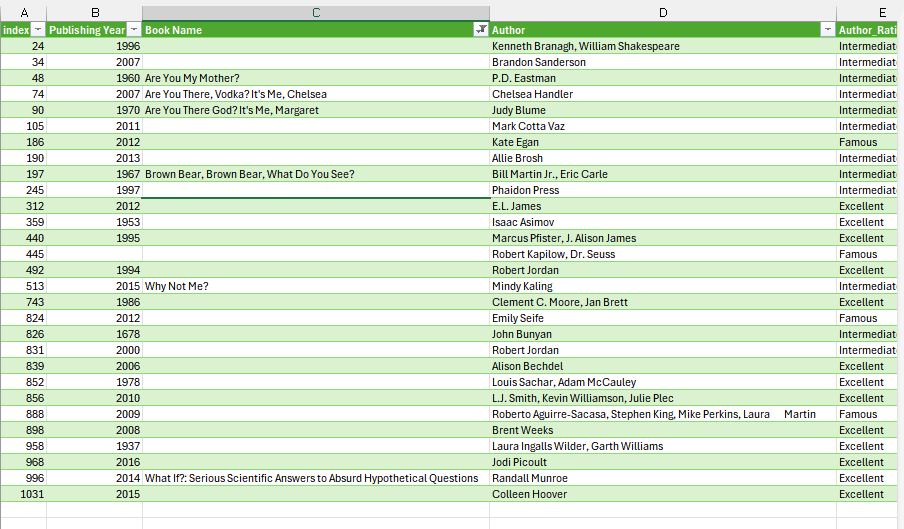 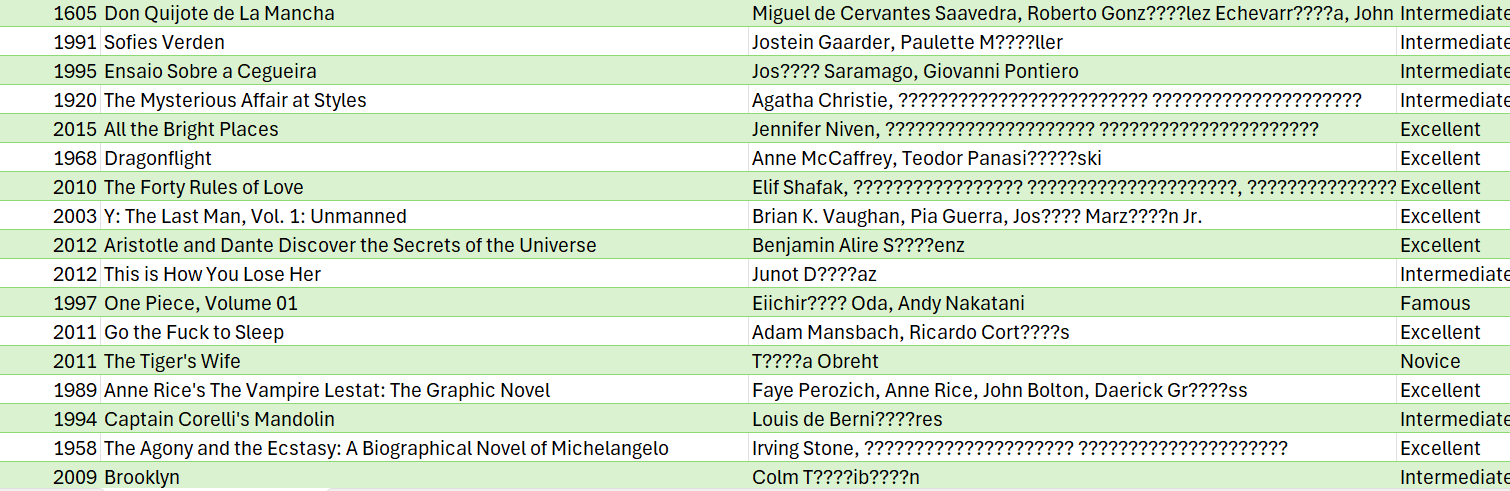
   # *After* 

   
   > 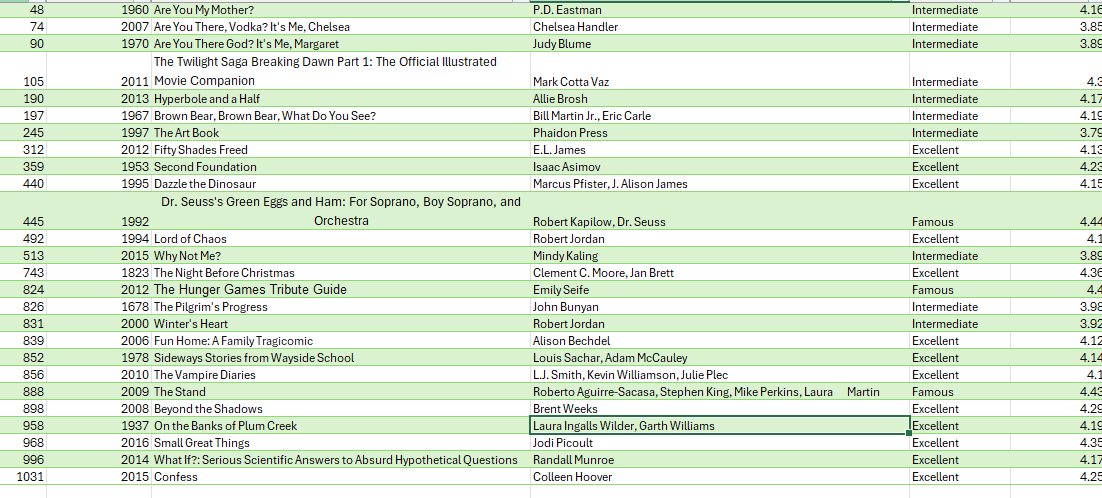 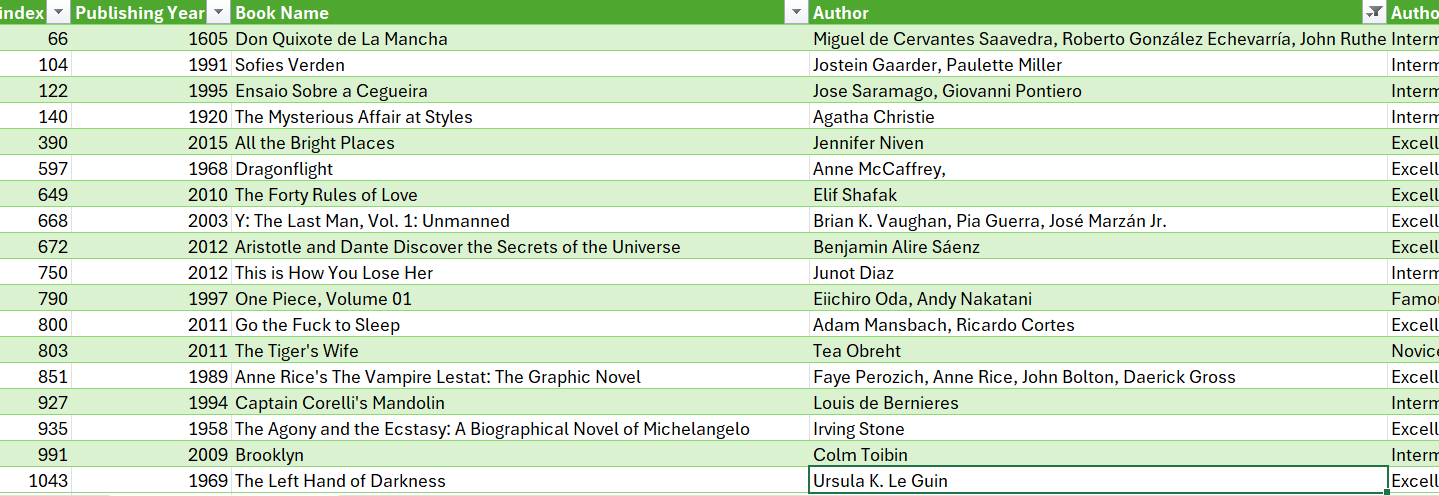

### **I also realized the genres for these books were either fiction or non-fiction but I wanted to get more accurate - So I used th help of AI (ChatGPT) to input the genres of each book beyond non-fiction and fiction! This will grant a much deeper insight into the analysis of genres over time*

>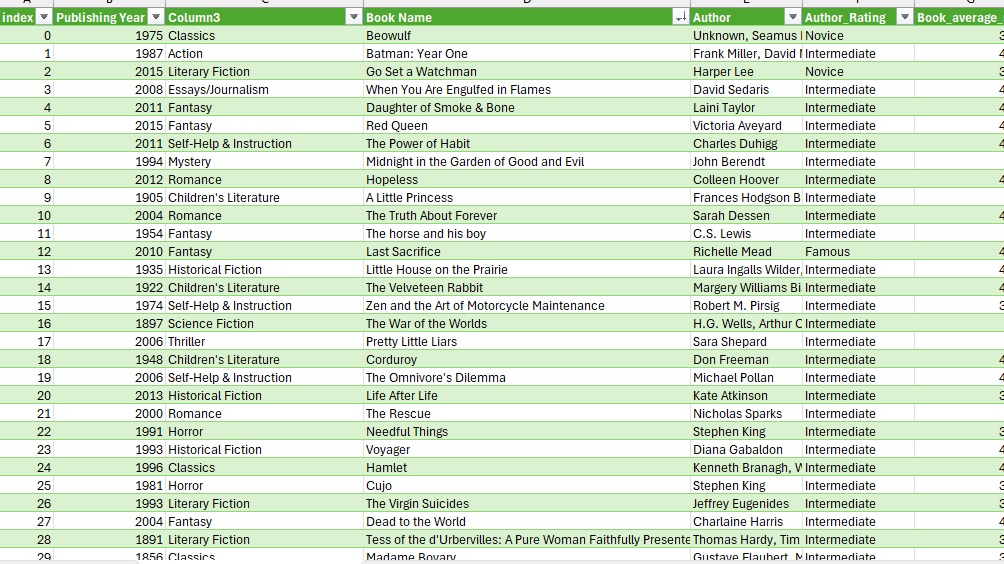

### 2. **Data Processing and Analysis**:
   - **SQL**: 
     - Utilized **JOINs** and **aggregate functions** to calculate yearly sales for each genre.
     - Created Common Table Expressions (CTEs) for efficient data aggregation.

All files were saved and loaded into SQL where I created a relational data base to really start the exploration!
1. index
Type: Integer (INT)
Description: This is the unique identifier for each row or record in the table. It acts as the primary key.


2. Publishing_Year
Type: Integer (INT)
Description: This represents the year the book was published, stored as a four-digit number.


3. Genre
Type: String (VARCHAR)
Description: This contains the literary genre of the book, such as "Children's Literature" or "Thriller."


4. Book_Name
Type: String (VARCHAR)
Description: The title of the book.


5. Author
Type: String (VARCHAR)
Description: The name(s) of the author(s) who wrote the book.


6. Author_Rating
Type: String (VARCHAR)
Description: A qualitative rating of the author’s skill, e.g., "Excellent" or "Novice." This appears to be subjective.


7. Book_average_rating
Type: Decimal (DECIMAL(3, 2))
Description: The average rating of the book, typically on a scale from 1.00 to 5.00, based on user reviews.


8. Book_ratings_count
Type: Integer (INT)
Description: The total number of ratings the book has received.


9. gross_sales
Type: Decimal (DECIMAL(10, 2))
Description: The gross sales revenue from the book, in millions of dollars.


10. publisher_revenue
Type: Decimal (DECIMAL(10, 3))
Description: The revenue earned by the publisher, in millions of dollars. This would be a portion of the gross sales.


11. sale_price
Type: Decimal (DECIMAL(5, 2))
Description: The price of the book, in dollars.


12. sales_rank
Type: Integer (INT)
Description: The sales rank of the book on the platform where it’s sold, such as Amazon. A lower rank indicates higher sales.


13. Publisher
Type: String (VARCHAR)
Description: The name of the publisher who published the book.


14. units_sold
Type: Integer (INT)
Description: The total number of copies of the book sold.

     


# Perform some general cleaning to enure only 16 genres remains in books db - noticed excel cleaning missed some rows
# Perform some general cleaning to remove and fix books with blank genres in books db
SELECT *
FROM books
WHERE Genre = '';
UPDATE books
SET Genre = 'Biography/Autobiography/Memoir'
WHERE `Index` = 475;

UPDATE books
SET Genre = 'Thriller'
WHERE `Index` = 773;
# Correct a misspelling in the Genre column
UPDATE books
SET Genre = 'Children''s Literature'
WHERE Genre = 'Chidren''s Literature';

# General cleaning for genres to ensure consistency
UPDATE books
SET Genre = 'Biography/Autobiography/Memoir'
WHERE Genre = 'Biography/Autobiography';

UPDATE books
SET Genre = 'Self-Help & Instruction'
WHERE Genre = 'Self-Help and Instruction';
SELECT * FROM books;
UPDATE books
SET Genre = 'Adventure'
WHERE `Index` = 548;

UPDATE books
SET Genre = 'Self-Help & Instruction'
WHERE `Index` = 568;

UPDATE books
SET Genre = 'Biography/Autobiography/Memoir'
WHERE `Index` = 256;

UPDATE books
SET Genre = 'Essays/Journalism'
WHERE Genre = 'Business/Leadership' AND `Index` = 401;

UPDATE books
SET Genre = 'Self-Help & Instruction'
WHERE Genre = 'Business/Leadership' AND `Index` = 459;

UPDATE books
SET Genre = 'Thriller'
WHERE Genre = 'Legal Thriller';

UPDATE books
SET Genre = 'Historical Fiction'
WHERE Genre = 'Western';

UPDATE books
SET Genre = 'Essays/Journalism'
WHERE Genre = 'Philosophy';

UPDATE books
SET Genre = 'Biography/Autobiography/Memoir'
WHERE Genre = 'Humor';

UPDATE books
SET Genre = 'Science Fiction'
WHERE Genre = 'Dystopian Fiction';

UPDATE books
SET Genre = 'Essays/Journalism'
WHERE `Index` = 412;

UPDATE books
SET Genre = 'Biography/Autobiography/Memoir'
WHERE `Index` = 297;

UPDATE books
SET Genre = 'Adventure'
WHERE `Index` = 222;

UPDATE books
SET Genre = 'Biography/Autobiography/Memoir'
WHERE `Index` = 249;

UPDATE books
SET Genre = 'Classics'
WHERE Genre = 'Drama';

# Fixing author names 
UPDATE books
SET Author = 'Stephen King'
WHERE Author LIKE '%Richard Bachman%';

UPDATE books
SET Author = 'Stephen King'
WHERE Author LIKE '%Roberto Aguirre%';
 
UPDATE books
SET Author = 'Robert Jordan, Brandon Sanderson'
WHERE Author LIKE '%Brandon Sanderson, Robert Jordan%';

# Standardizing publisher names
UPDATE books
SET Publisher = 'HarperCollins'
WHERE Publisher LIKE '%HarperCollins%';

#final look at cleaned up table
SELECT * FROM books;

# With all our data cleaned up, we can now accurate organize the data according to highest rated genres
SELECT 
    Genre,
    AVG(Book_average_rating) AS average_rating,
    SUM(gross_sales) AS total_gross_sales
FROM 
    books
GROUP BY 
    Genre
ORDER BY 
    average_rating DESC;

#We also want the top authors based on various values for all their books
SELECT 
    SUBSTRING_INDEX(Author, ',', 1) AS Prim_Author,
    SUM(gross_sales) AS total_gross_sales,
    COUNT(Book_Name) AS book_count,
    SUM(units_sold) AS total_units_sold,
    RANK() OVER (ORDER BY SUM(gross_sales) DESC) AS sales_rank
FROM 
    books
GROUP BY 
    Prim_Author
ORDER BY 
    sales_rank;
    
#Next we will sum up our main Publishers to see who does best in gross sales, ratings, and units sold
SELECT 
    Publisher,
    SUM(gross_sales) AS total_gross_sales,
    AVG(Book_average_rating) AS average_rating,
    SUM(publisher_revenue) AS total_publisher_revenue
FROM 
    books
GROUP BY 
    Publisher
ORDER BY 
    total_gross_sales DESC;
    
# Analyze genre performance over time (grouping by genre and publishing year)
SELECT 
    Genre,
    Publishing_Year,
    SUM(gross_sales) AS total_gross_sales,
    AVG(Book_average_rating) AS average_rating
FROM 
    books
GROUP BY 
    Genre, Publishing_Year
ORDER BY 
    Genre, Publishing_Year;

    
# Find publisher performance in specific genres, ranked by total gross sales
SELECT 
    Publisher,
    Genre,
    SUM(gross_sales) AS total_gross_sales,
    AVG(Book_average_rating) AS average_rating,
    SUM(units_sold) AS total_units_sold
FROM 
    books
GROUP BY 
    Publisher, Genre
ORDER BY 
    total_gross_sales DESC;
    

# Find the books with the highest sale prices and their corresponding sales performance
SELECT 
    Book_Name,
    Author,
    Genre,
    sale_price,
    gross_sales,
    units_sold
FROM 
    books
ORDER BY 
    sale_price DESC
LIMIT 10;

SELECT 
    Genre,
    Publishing_Year,
    SUM(gross_sales) AS total_gross_sales,
    AVG(Book_average_rating) AS average_rating
FROM 
    books
GROUP BY 
    Genre, Publishing_Year
ORDER BY 
    Genre, Publishing_Year;
    
# Step 11: Analyze how author rating correlates with gross sales, average book rating,  over time
SELECT 
    Author_Rating,
    Publishing_Year,
    SUM(gross_sales) AS total_gross_sales,
    AVG(Book_average_rating) AS average_book_rating
FROM  
    books
GROUP BY 
    Author_Rating,  -- Grouping by Author Rating to track by category
    Publishing_Year -- Grouping by year to track changes over time
ORDER BY 
    Publishing_Year, -- Sorting results by year for proper chronological order
    Author_Rating;  -- Sorting by Author Rating for better readability

#general query for ratings over time sorted by author rating, publisher, or genre
SELECT 
    Publishing_Year,
    Genre,
    Publisher,
    Author_Rating,
    AVG(Book_average_rating) AS average_rating
FROM 
    books
GROUP BY 
    Publishing_Year, Genre, Publisher, Author_Rating
ORDER BY 
    Publishing_Year;  -- Default sorting by year


### 3. **Data Visualization**:
   - **Power BI**: 
     - Designed a visually compelling dashboard that displays genre trends over time.
     - Currently implementing interactive filters for genre, year, and demographic, allowing stakeholders to explore the data from multiple perspectives.
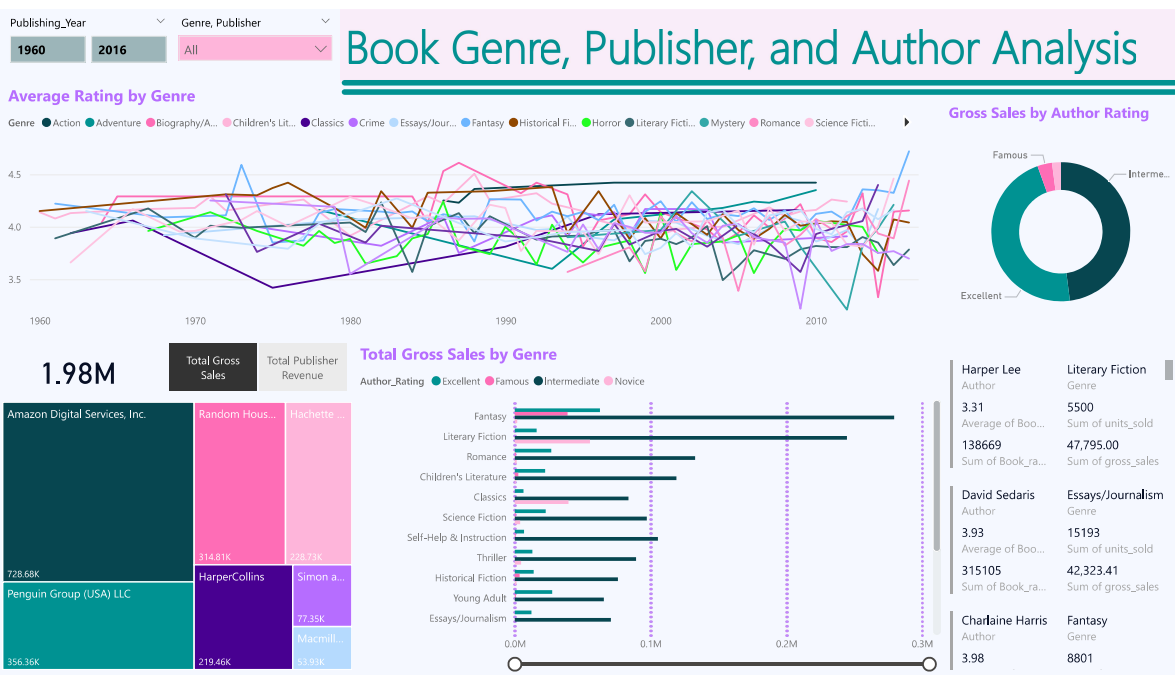

### **Key Skills Used**:
- **SQL**: CRUD, CTEs, aggregate functions, and data transformation. Leveraged SQL to extract relevant data, including book genres, publication years, and sales information from **Kaggle dataset**.
- **Excel**: Expertise in data cleaning, preparation, and Python integration.
- **Power BI**: Expertise in DAX, data visualization, ETL, and dashboard creation.

### **Results & Key Product Recommendations**:
The analysis revealed significant trends that can inform publishing strategies:
1. **Popular Genres**: *Increased Marketing for Fantasy and Literary fiction, Focus marketing efforts on these growing genres to boost sales.
2. **Declining Genres**: *Targeted Campaigns* Introduce fresh sub-genres or rebrand declining ones, like crime, and and science fiction to spark renewed interest in declining genres.
3. **Cross-Genre Experimentation**: Encouraging authors to create works that combine elements of different genres (e.g., Fantasy-Romance) could attract readers from multiple demographics and fanbases.

### **Key Product Adjustments**:
2. **Targeted Campaigns for Declining Genres**: Introduce fresh sub-genres or rebrand older ones to spark renewed interest in declining genres.
3. **Cross-Genre Experimentation**: Encourage intermediate authors to collaborate with Penguin, Random House, and Amazon Digital Services

### **Next Steps**:
2. **Collaborate with Authors**: Work closely with novice and excellent rated authors to create content that aligns with current genre trends while incorporating elements from declining genres.
3. **Track and Measure Success**: Use Power BI to monitor changes in genre and publisher popularity and evaluate the success of marketing efforts and product adjustments over time.

---

